In [314]:
from cProfile import label

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [315]:
csv_file = "jass_data/rl_training_data/jass2_scrofaV1_vs_Mix_v1_data.csv"

# jass_scrofa_v1_data.csv
# jass_test_metrics.csv

In [316]:
df = pd.read_csv(csv_file, index_col=0)

In [317]:
# df = df.drop_duplicates()


In [318]:
df.reset_index(drop=True, inplace=True)


In [319]:
df.describe()

,episode,team_points,opponent_points,win,total_wins,win_rate,reward,avg_reward,policy_loss,value_loss,total_loss,epsilon,rewards
count,16000.00000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,0.0,16000.000000,15987.000000,15987.000000,15987.000000,16000.000000,16000.000000
mean,1000.50000,78299.885688,78778.614312,0.497937,498.529375,49.695281,NaN,0.002617,-0.447727,0.022388,-0.201476,0.680530,35.959923
std,577.36824,45248.292896,45419.402727,0.500011,288.674449,3.091135,NaN,0.004034,0.149714,0.017124,0.075833,0.225056,21.222617
min,1.00000,25.000000,14.000000,0.000000,0.000000,0.000000,NaN,-0.005476,-0.867052,0.000116,-0.413537,0.303227,-9.082803
25%,500.75000,39117.750000,39503.250000,0.000000,248.000000,48.611111,NaN,0.001129,-0.559161,0.012138,-0.256332,0.452351,17.044586
50%,1000.50000,78544.000000,78534.000000,0.000000,501.000000,49.939136,NaN,0.001891,-0.466721,0.018141,-0.211301,0.700828,36.057325
75%,1500.25000,117448.500000,118124.250000,1.000000,747.000000,50.819672,NaN,0.002787,-0.350063,0.026772,-0.154238,0.887956,51.936306
max,2000.00000,158682.000000,159560.000000,1.000000,1024.000000,100.000000,NaN,0.107156,-0.002984,0.233133,0.171827,0.999900,92.726115


In [320]:
df.head(10)

,episode,team_points,opponent_points,win,total_wins,win_rate,reward,avg_reward,policy_loss,value_loss,total_loss,epsilon,rewards
0,1,48.0,109.0,0,0,0.000000,NaN,0.000000,NaN,NaN,NaN,0.99990,0.000000
1,2,110.0,204.0,0,0,0.000000,NaN,0.000000,NaN,NaN,NaN,0.99985,0.000000
2,3,155.0,316.0,0,0,0.000000,NaN,0.000000,NaN,NaN,NaN,0.99980,0.000000
3,4,220.0,408.0,0,0,0.000000,NaN,0.000000,NaN,NaN,NaN,0.99975,0.000000
4,5,342.0,443.0,1,1,20.000000,NaN,0.042004,-0.027742,0.078464,0.064594,0.99970,1.554140
5,6,392.0,550.0,0,1,16.666667,NaN,0.003474,-0.027949,0.067598,0.053623,0.99965,0.191083
6,7,490.0,609.0,1,2,28.571429,NaN,0.019453,-0.028146,0.000237,-0.013836,0.99960,1.439490
7,8,534.0,722.0,0,2,25.000000,NaN,0.000000,-0.028096,0.103665,0.089616,0.99955,0.000000
8,9,645.0,768.0,1,3,33.333333,NaN,0.012855,-0.028199,0.000116,-0.013983,0.99950,1.414013
9,10,722.0,848.0,0,3,30.000000,NaN,0.002686,-0.028462,0.037752,0.023521,0.99945,0.394904


In [321]:
df['win'].unique()

array([0, 1])

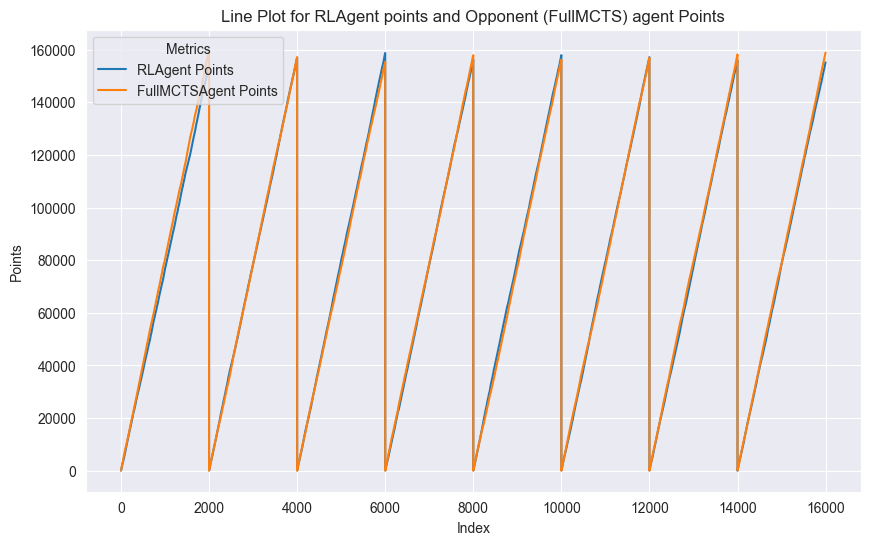

In [322]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="team_points", label="RLAgent Points")
sns.lineplot(data=df, x=df.index, y="opponent_points", label="FullMCTSAgent Points")

plt.title("Line Plot for RLAgent points and Opponent (FullMCTS) agent Points")
plt.xlabel("Index")
plt.ylabel("Points")
plt.legend(title="Metrics")
plt.grid(True)

plt.show()

In [323]:
# plt.figure(figsize=(10, 6))
# sns.barplot(data=df, x=df.index, y="team_points", label="RLAgent Points")
# 
# plt.title("Line Plot for RLAgent points and Opponent (FullMCTS) agent Points")
# plt.xlabel("Index")
# plt.ylabel("Points")
# plt.legend(title="Metrics")
# plt.grid(True)
# 
# plt.show()

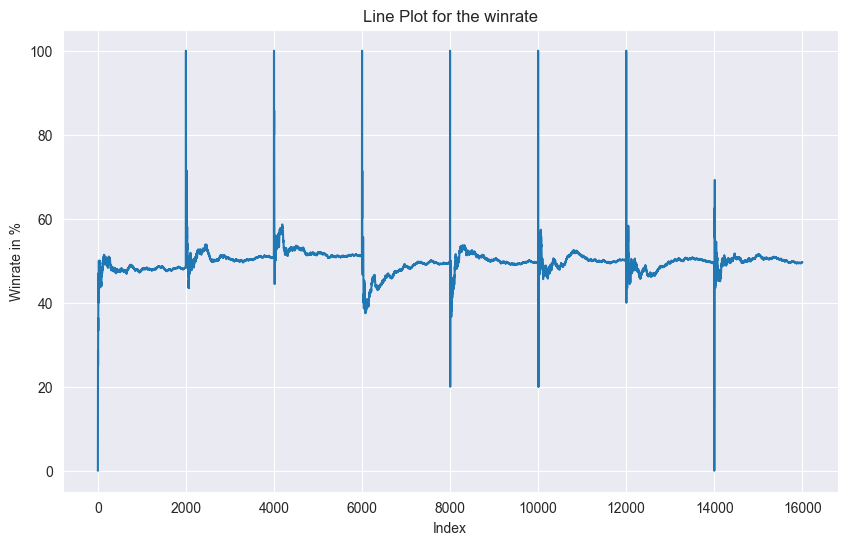

In [324]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="win_rate")

plt.title("Line Plot for the winrate")
plt.xlabel("Index")
plt.ylabel("Winrate in %")
plt.grid(True)

plt.show()

In [325]:
df.tail(50)

,episode,team_points,opponent_points,win,total_wins,win_rate,reward,avg_reward,policy_loss,value_loss,total_loss,epsilon,rewards
15950,1951,151340.0,154967.0,1,965,49.461814,NaN,0.000415,-0.497246,0.020360,-0.228263,0.310750,17.681529
15951,1952,151405.0,155059.0,0,965,49.436475,NaN,0.000388,-0.404987,0.017755,-0.184738,0.310595,16.509554
15952,1953,151476.0,155145.0,0,965,49.411162,NaN,0.000388,-0.682862,0.045716,-0.295715,0.310439,16.509554
15953,1954,151599.0,155179.0,1,966,49.437052,NaN,0.000424,-0.686911,0.039436,-0.304019,0.310284,18.076433
15954,1955,151650.0,155285.0,0,966,49.411765,NaN,0.000424,-0.720242,0.020555,-0.339566,0.310129,18.076433
15955,1956,151732.0,155360.0,1,967,49.437628,NaN,0.000448,-0.591588,0.016043,-0.279751,0.309974,19.121019
15956,1957,151839.0,155410.0,1,968,49.463464,NaN,0.000480,-0.531497,0.012295,-0.253454,0.309819,20.484076
15957,1958,151936.0,155470.0,1,969,49.489275,NaN,0.000509,-0.625199,0.047680,-0.264919,0.309664,21.719745
15958,1959,152013.0,155550.0,0,969,49.464012,NaN,0.000485,-0.561129,0.018699,-0.261865,0.309509,20.700637
15959,1960,152057.0,155663.0,0,969,49.438776,NaN,0.000451,-0.592867,0.030207,-0.266227,0.309355,19.261146


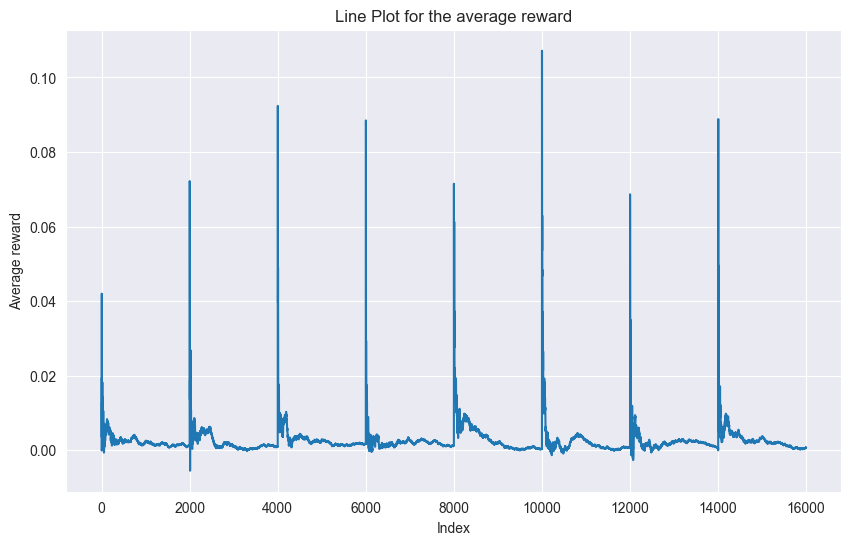

In [326]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="avg_reward")

plt.title("Line Plot for the average reward")
plt.xlabel("Index")
plt.ylabel("Average reward")
plt.grid(True)

plt.show()

<Figure size 1000x600 with 0 Axes>

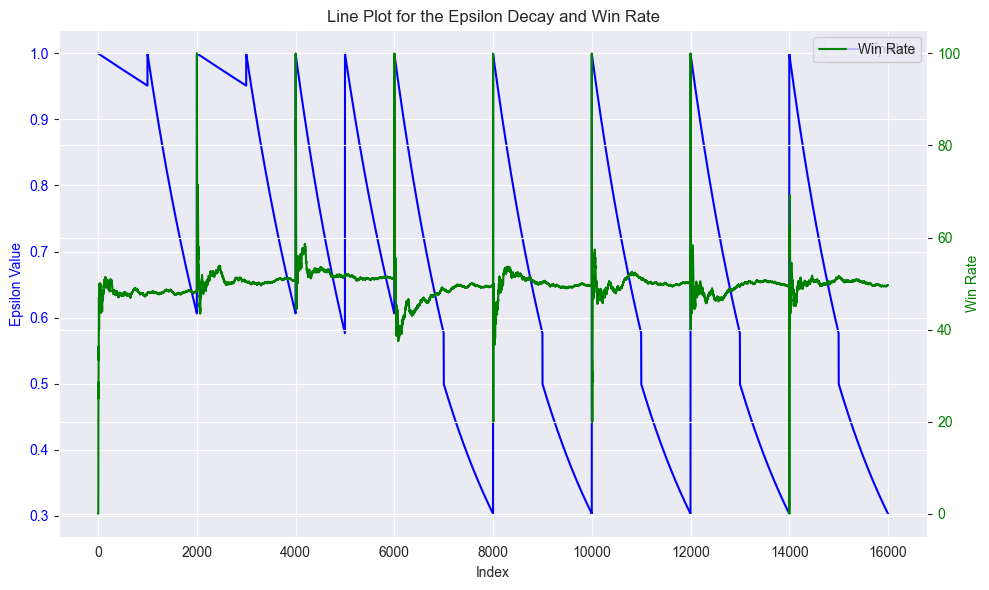

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# First y-axis for epsilon
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="epsilon", ax=ax1, label="Epsilon", color="blue")
ax1.set_xlabel("Index")
ax1.set_ylabel("Epsilon Value", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Second y-axis for win_rate
ax2 = ax1.twinx()
sns.lineplot(data=df, x=df.index, y="win_rate", ax=ax2, label="Win Rate", color="green")
ax2.set_ylabel("Win Rate", color="green")
ax2.tick_params(axis='y', labelcolor="green")

# Title and grid
plt.title("Line Plot for the Epsilon Decay and Win Rate")
plt.grid(True)
fig.tight_layout()

plt.show()


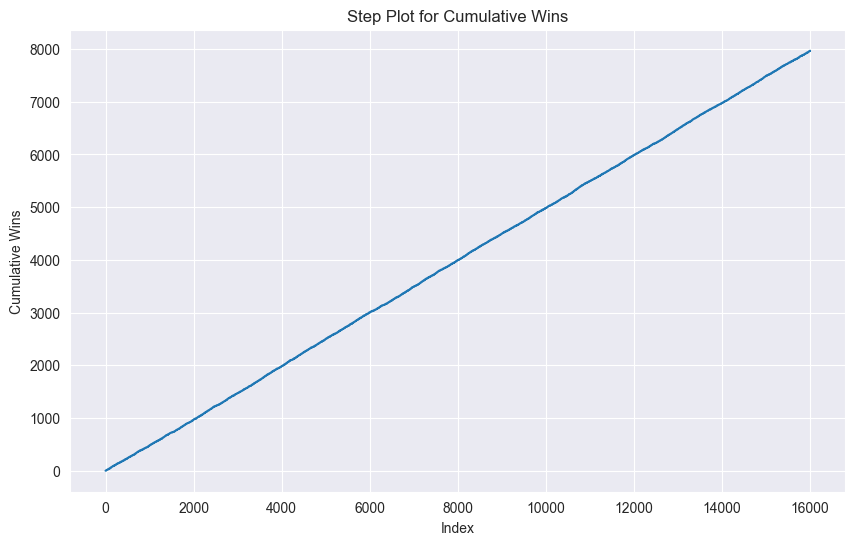

In [328]:
plt.figure(figsize=(10, 6))
plt.step(df.index, df['win'].cumsum(), where='post')

plt.title("Step Plot for Cumulative Wins")
plt.xlabel("Index")
plt.ylabel("Cumulative Wins")
plt.grid(True)

plt.show()



C:\Users\aaron\PycharmProjects\jassager\.env3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


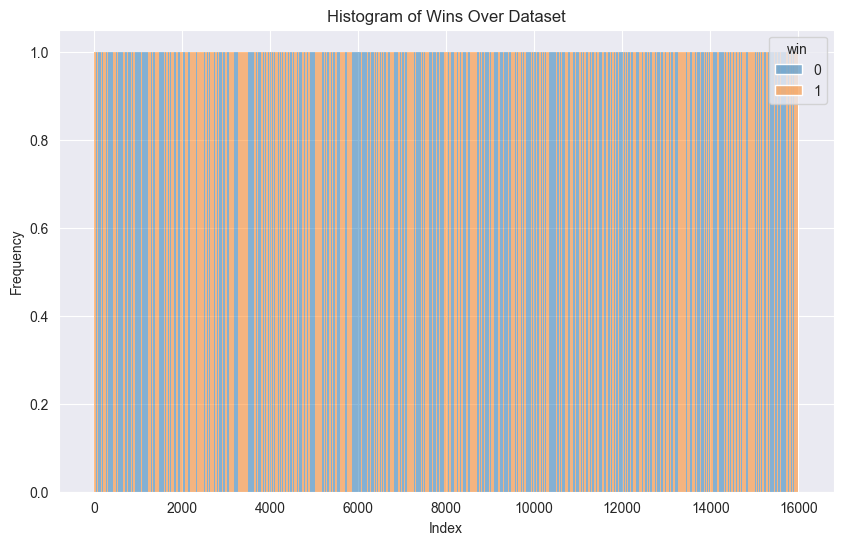

In [329]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=df.index, hue='win', discrete=True, kde=False)

plt.title("Histogram of Wins Over Dataset")
plt.xlabel("Index")
plt.ylabel("Frequency")
plt.grid(True)

plt.show()


C:\Users\aaron\AppData\Local\Temp\ipykernel_30548\3266479831.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_counts = df.groupby(pd.cut(df.index, bins=10))['win'].sum()


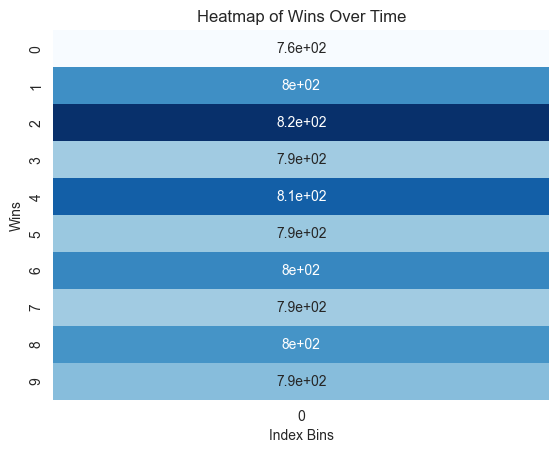

In [330]:
win_counts = df.groupby(pd.cut(df.index, bins=10))['win'].sum()
sns.heatmap(win_counts.values.reshape(-1, 1), annot=True, cmap="Blues", cbar=False)

plt.title("Heatmap of Wins Over Time")
plt.xlabel("Index Bins")
plt.ylabel("Wins")
plt.show()


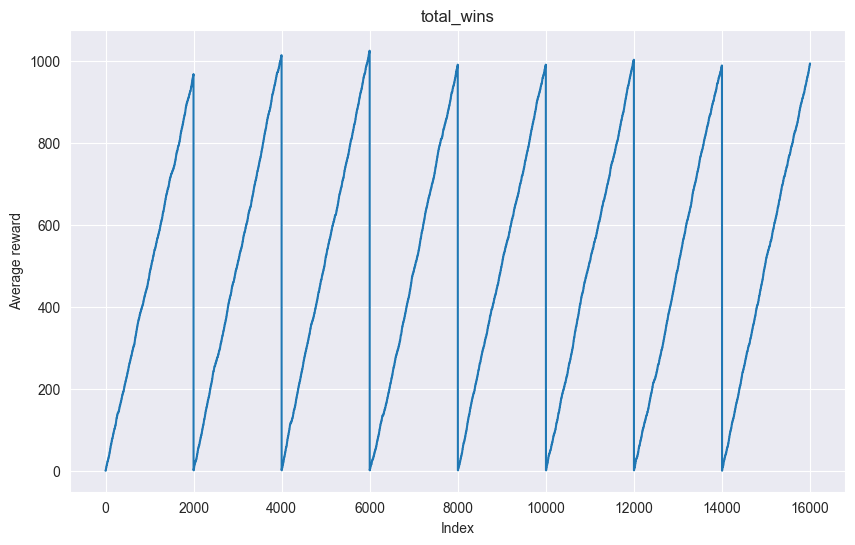

In [331]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="total_wins")

plt.title("total_wins")
plt.xlabel("Index")
plt.ylabel("Average reward")
plt.grid(True)

plt.show()

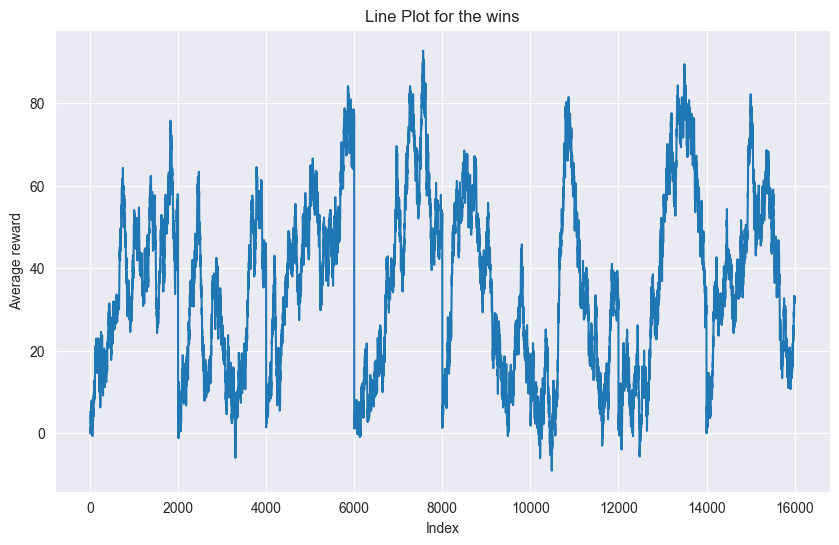

In [332]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="rewards")

plt.title("Line Plot for the wins")
plt.xlabel("Index")
plt.ylabel("Average reward")
plt.grid(True)

plt.show()

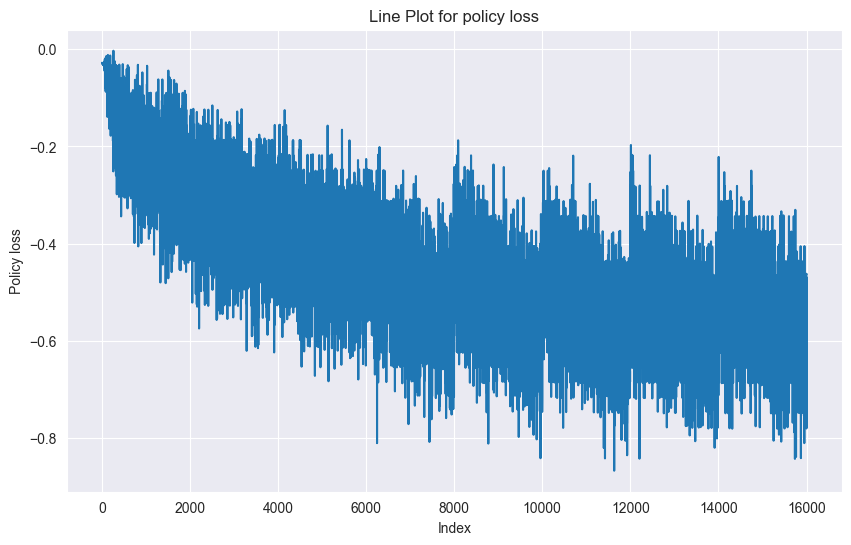

In [333]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="policy_loss")

plt.title("Line Plot for policy loss")
plt.xlabel("Index")
plt.ylabel("Policy loss")
plt.grid(True)

plt.show()

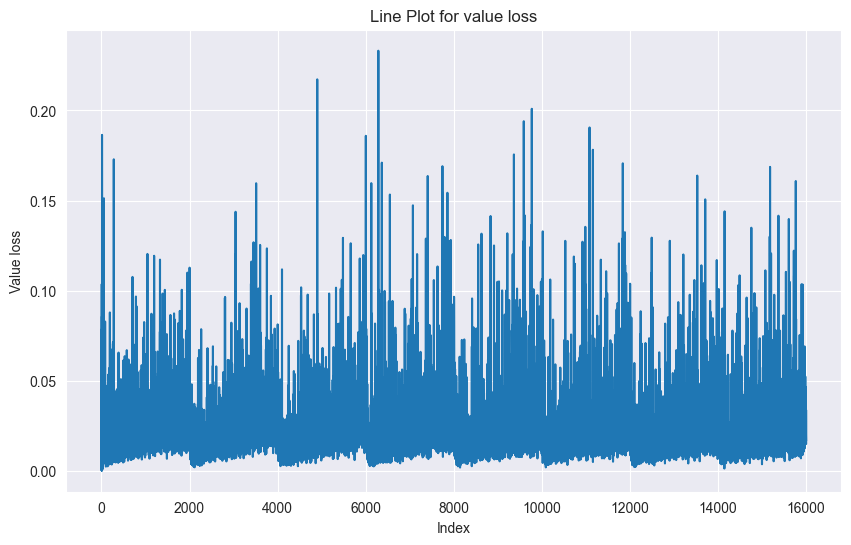

In [334]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="value_loss")

plt.title("Line Plot for value loss")
plt.xlabel("Index")
plt.ylabel("Value loss")
plt.grid(True)

plt.show()

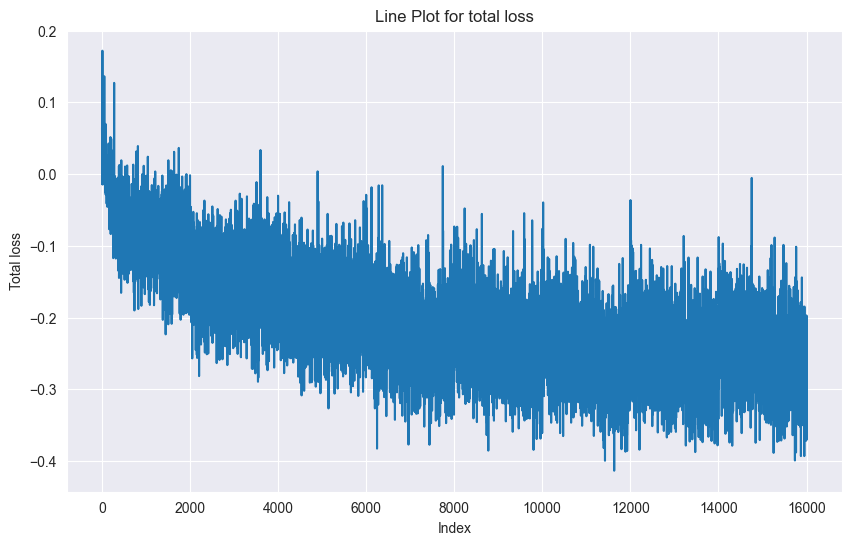

In [335]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="total_loss")

plt.title("Line Plot for total loss")
plt.xlabel("Index")
plt.ylabel("Total loss")
plt.grid(True)

plt.show()